# Case Study 12

William Nayden and Quynh Chau
March 29, 2021

## 1 INTRODUCTION

The purpose of this case study is to duplicate the Baldi et al. study titled "Searching for Exotic Particles in High-Energy
Physics using Deep Learning" by implementing neural network model via TensorFlow in Python. Data can be downloaded from the
following site:  'https://archive.ics.uci.edu/ml/datasets/HIGGS'.

## 2 METHOD

### Data Preparation

This data has 10,999,999 rows and 29 columns, including the target variable.  Descriptive column names were added based on the data description found on the source site.  The first column contains the target variable, 'class', which is a categorical variable of value 1 or 0 (1= signal, 0 = background).  The remaining 28 columns represent various features related to whether the particle is an exotic particle with a unique signal or just noise.  Feature values were numeric.

We scaled the data between 0 and 100 fore easier model training and decided on an 80/20 train/test split with random seed equal to 7.

### Neural Network (NN) Model

Our neural network (NN) model was built via sequential layering. Our input layer uses the 28 features related to our particles. The first hidden layer has 100 neurons, the second has 50 neurons, and our output layer has one neuron. Both of our hidden layers use `tanh` activation. We used the `stochastic gradient descent` optimizer, seeking the lowest `mean absolute error` for our model.

## 3 RESULTS

We trained our NN model over 10 epochs and got the following results:

|Metric|Value|
|:---: |:---:|
|Loss|0.2068|
|MSE|0.2068|
|MAE|0.4171|
|Accuracy|0.6769|
|AUC|0.7401|

Our result was within range but decidedly not as good as the best performing accuracy and AUC metrics from the best performing models described in Baldi et al. The neural network in Baldi et al. ranged from 0.733-0.816 for different feature levels using 300 hidden layers whereas ours was 0.7401 for 100 neurons.

## 4 CONCLUSION

Our neural network used just two hidden layers, while the network in Baldi et al used five layers. Additionally, Baldi et al used 300 neurons for each layer, while we used 100 neurons for our first hidden layer and 50 neurons for our second. At its most dense iteration with 10,000 neurons, the Baldi study resulted in AUC ranging from 0.790 to 0.841.  One improvement we could make was to make our NN model more dense with 10,000 neurons.  Furthermore, we could have added more layers as in the Baldi et al paper.  

In addition, a possible improvement we could make is using a more modern optimizer for our model. While we chose `sgd` because is is most familiar, we could have easily chosen `adam` or `RMSprop`, which were available when Baldi et al was written.  Current optimizers could improve model performance.

Additionally, we wanted to go with a model that was computationally inexpensive by 2021 standards because of the limitations of our local machines, but it would likely be considered computationally expensive by 1986 standards. We could probably build a more complex model that better takes advantage of advances in computers.

Ultimately, our model reported performance based on mean square error (MSE = 0.2068).

## APPENDIX : CODE

In [52]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [53]:
print(tf.__version__)

2.1.0


In [54]:
import os as os
os.getcwd()
os.chdir('C:/SMU/DS 7333 Quant the World/Case Studies\Case Study week 12')

## Reading in Data and Data Prepping

In [55]:
# Read in data
df = pd.read_csv("HIGGS.csv",nrows = 1000000, header = None, dtype=np.float32)
df.to_csv("HIGGSSubset.csv", header = None)

In [56]:
# Rename columns for descriptive feature identification
df.columns = ['class', 'Lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_mag', 'missing_energy_phi',
                   'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_btag','jet_2_pt','jet_2_eta', 'jet_2_phi','jet_2_btag',
                   'jet_3_pt','jet_3_eta', 'jet_3_phi','jet_3_btag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_btag',
                   'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
df.head(5)

,class,Lepton_pT,lepton_eta,lepton_phi,missing_energy_mag,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [57]:
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

The data set has 1000000 rows and 29 columns


,class,Lepton_pT,lepton_eta,lepton_phi,missing_energy_mag,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.529673,0.991636,0.000489,-0.000953,0.998163,-0.000573,0.990576,-0.000824,0.000549,1.003582,...,-0.000375,-0.001724,1.001547,1.034308,1.024927,1.055578,1.009864,0.973244,1.033359,0.959868
std,0.498550,0.564946,1.008089,1.005646,0.598998,1.006654,0.474941,1.010140,1.006106,1.027217,...,1.007577,1.005506,1.397190,0.671789,0.379662,0.164348,0.397682,0.525081,0.364940,0.313111
min,0.000000,0.274697,-2.434976,-1.742508,0.000626,-1.743944,0.138602,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.101168,0.234753,0.092202,0.157473,0.048125,0.303350,0.350939
25%,0.000000,0.590753,-0.737349,-0.871931,0.576455,-0.871791,0.678535,-0.689225,-0.867542,0.000000,...,-0.714190,-0.872034,0.000000,0.790729,0.846332,0.985750,0.767338,0.673858,0.819379,0.770333
50%,1.000000,0.853737,0.000920,0.000417,0.891644,-0.000800,0.894178,-0.001016,0.000715,1.086538,...,0.000372,-0.005259,0.000000,0.894967,0.950568,0.989771,0.916455,0.873490,0.947443,0.871788
75%,1.000000,1.236958,0.738214,0.868775,1.293112,0.871773,1.170649,0.687194,0.869976,2.173076,...,0.714934,0.868831,3.101961,1.024375,1.083443,1.020216,1.142236,1.139482,1.140750,1.059245
max,1.000000,8.711782,2.434868,1.743236,9.900929,1.743257,8.382610,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,31.076191,15.637859,5.921233,10.794087,13.735691,8.779915,6.259156


,class,Lepton_pT,lepton_eta,lepton_phi,missing_energy_mag,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


float32    29
dtype: int64

## Building Neural Network 

### Preparing input features and target output variable ('class')

In [58]:
y=df['class']
y

0         1.0
1         1.0
2         1.0
3         0.0
4         1.0
         ... 
999995    1.0
999996    1.0
999997    0.0
999998    0.0
999999    0.0
Name: class, Length: 1000000, dtype: float32

In [59]:
# Making the target variable, 'class', into an numpy array
y=np.array(df['class'])
y

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [60]:
x=df.drop(['class'], axis=1)

### Scale Data

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.2871342739 and adding 0.499969


### Split data into training and test (validation) subsets

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=7)

### Build NN Model

In [63]:
x_train.shape

(800000, 28)

In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1, activation='linear'))  # adds a layer with 1 neurons, linear (aka NO) activation


### Compile Model

In [65]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error','accuracy'])

### Fit the Model

In [66]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=34)


Train on 800000 samples, validate on 200000 samples
Epoch 1/10
800000/800000 [==============================] - 53s 67us/sample - loss: 0.2366 - mean_squared_error: 0.2366 - mean_absolute_error: 0.4748 - accuracy: 0.5897 - val_loss: 0.2287 - val_mean_squared_error: 0.2287 - val_mean_absolute_error: 0.4554 - val_accuracy: 0.6189
Epoch 2/10
800000/800000 [==============================] - 54s 67us/sample - loss: 0.2265 - mean_squared_error: 0.2265 - mean_absolute_error: 0.4540 - accuracy: 0.6258 - val_loss: 0.2288 - val_mean_squared_error: 0.2288 - val_mean_absolute_error: 0.4563 - val_accuracy: 0.6124
Epoch 3/10
800000/800000 [==============================] - 56s 70us/sample - loss: 0.2236 - mean_squared_error: 0.2236 - mean_absolute_error: 0.4484 - accuracy: 0.6362 - val_loss: 0.2217 - val_mean_squared_error: 0.2217 - val_mean_absolute_error: 0.4421 - val_accuracy: 0.6412
Epoch 4/10
800000/800000 [==============================] - 55s 68us/sample - loss: 0.2211 - mean_squared_error: 0

In [30]:
### Review Model History and Comparative Performance

In [67]:
model.history.history

{'loss': [0.2366141768554598,
  0.2265159061010927,
  0.22355535491537304,
  0.22110678348779678,
  0.21878414987515657,
  0.21665914227759467,
  0.21429911603838206,
  0.21176092233454807,
  0.20912767866445706,
  0.20682945714594797],
 'mean_squared_error': [0.23661458,
  0.22651647,
  0.223555,
  0.22110687,
  0.21878482,
  0.21665943,
  0.21429831,
  0.21176215,
  0.2091275,
  0.20683005],
 'mean_absolute_error': [0.47479177,
  0.4540359,
  0.44843525,
  0.44426444,
  0.43990642,
  0.43581548,
  0.43146,
  0.4268657,
  0.4218828,
  0.41716695],
 'accuracy': [0.589745,
  0.625825,
  0.63623625,
  0.6430675,
  0.6501925,
  0.6551238,
  0.66042125,
  0.66626126,
  0.6714587,
  0.6767975],
 'val_loss': [0.22868566791594028,
  0.22878000627711415,
  0.22173909616798163,
  0.2190503909663856,
  0.2204366422738135,
  0.21479878485485912,
  0.22113717370696365,
  0.2116478346760571,
  0.20723794947639107,
  0.2090008020016551],
 'val_mean_squared_error': [0.22868574,
  0.22878015,
  0.2217

In [75]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score) 
print('Test accuracy:', score)

Test loss: [0.20900080184936523, 0.20900051, 0.4185159, 0.676905]
Test accuracy: [0.20900080184936523, 0.20900051, 0.4185159, 0.676905]


In [70]:
pred = model.predict(x_test) 

In [72]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, pred)

print(auc_score)

0.7400840687926283


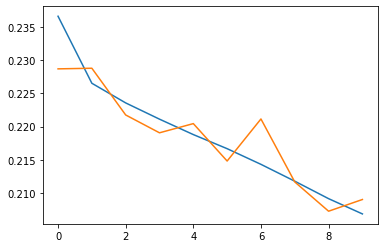

In [73]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2900      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________
